In [10]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
# csv読み込み
data = pd.read_csv('./prefecture.csv', index_col=0)

# 説明変数
x = data[['visitor']]

# 目的変数
y = data['travel_consumption']

# 学習データ、テストデータを分ける（test_sizeでテストデータの割合を決める）
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [13]:
# 回帰分析モデル作成
model = LinearRegression()

In [14]:
# 学習データで学習を実行
model.fit(X_train, Y_train)
print('*' * 50)
print('学習結果')
print('*' * 50)
print('直線の傾き：{}'.format(model.coef_))
print('切片：{}'.format(model.intercept_))

**************************************************
学習結果
**************************************************
直線の傾き：[56.95984012]
切片：-45280.79314852884


<function matplotlib.pyplot.show(*args, **kw)>

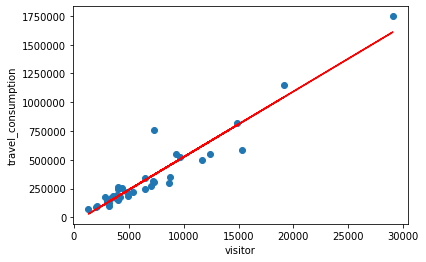

In [15]:
# 学習結果をグラフにする
%matplotlib inline

# 実績値を点で表す
plt.scatter(X_train, Y_train)
# 実績値に近づくような直線を引く
plt.plot(X_train, model.predict(X_train), color='red')

plt.xlabel('visitor')
plt.ylabel('travel_consumption')   
plt.show

In [16]:
# テストデータで予測を実行
result_pred = model.predict(X_test)

# travel_consumptionの正解値と予測値を表示する

# DataFrameを作成する
df_result = pd.DataFrame(np.array([Y_test, result_pred]).T)
# カラム名を追加
df_result.columns = ['正解値', '予測値']

print('*' * 50)
print('予測結果')
print('*' * 50)
df_result

**************************************************
予測結果
**************************************************


正解値            予測値
0   97814.0   82537.088077
1  350632.0  344267.553421
2  112391.0  101561.674677
3  148133.0  118478.747192
4  652754.0  769757.559106
5  803936.0  844033.190621
6  220999.0  261334.026209
7  191660.0  152085.052862
8  374122.0  519248.182265
9  149284.0  223227.893170

In [17]:
# 予測精度
score_pred = model.score(X_test, Y_test)
print('*' * 50)
print('予測精度')
print('*' * 50)
print(score_pred)

**************************************************
予測精度
**************************************************
0.9118684189899585
